In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('BP_style')

In [47]:
df = pd.read_csv('Enchantmentsdata_2021.csv')

In [48]:
column_labels = df.iloc[0]

In [49]:
column_labels = column_labels.to_list()[1:]

In [50]:
columns_dict = dict([(str(num), label) for num, label in enumerate(column_labels)])

In [51]:
df = df.drop(df['0'][df['0']=='Preferred Entry \nDate 1'].index)

In [101]:
#df['0'] = df['0'].astype('datetime64')
pd.to_datetime(df['Preferred Entry \nDate 1'])

9423    2021-05-15
8070    2021-05-15
7995    2021-05-15
33618   2021-05-15
11701   2021-05-15
           ...    
11728   2021-10-29
30779   2021-10-29
23936   2021-10-30
36479   2021-10-30
19265   2021-10-30
Name: Preferred Entry \nDate 1, Length: 36769, dtype: datetime64[ns]

In [53]:
df.reset_index(inplace=True)

In [54]:
df = df.drop(columns=['index', 'Unnamed: 0'])

In [65]:
df = df.rename(columns = columns_dict)

In [80]:
df = df.sort_values('Preferred Entry \nDate 1')

In [98]:
df['Awarded \nGroup Size'].value_counts().sort_index()

1     61
2    495
3    144
4    678
5    174
6    376
7     26
8    472
Name: Awarded \nGroup Size, dtype: int64

In [103]:
preferred_date_1 = df['Preferred Entry \nDate 1'].value_counts()
#preferred_date_2 = df['Preferred Entry Date 2'].value_counts()
#preferred_date_3 = df['Preferred Entry Date \n3'].value_counts(sort=False)

In [109]:
preferred_date_1 = preferred_date_1.sort_index().reset_index()

In [120]:
preferred_week_1 = preferred_date_1.resample('W', on = 'index')['Preferred Entry \nDate 1'].sum().reset_index()

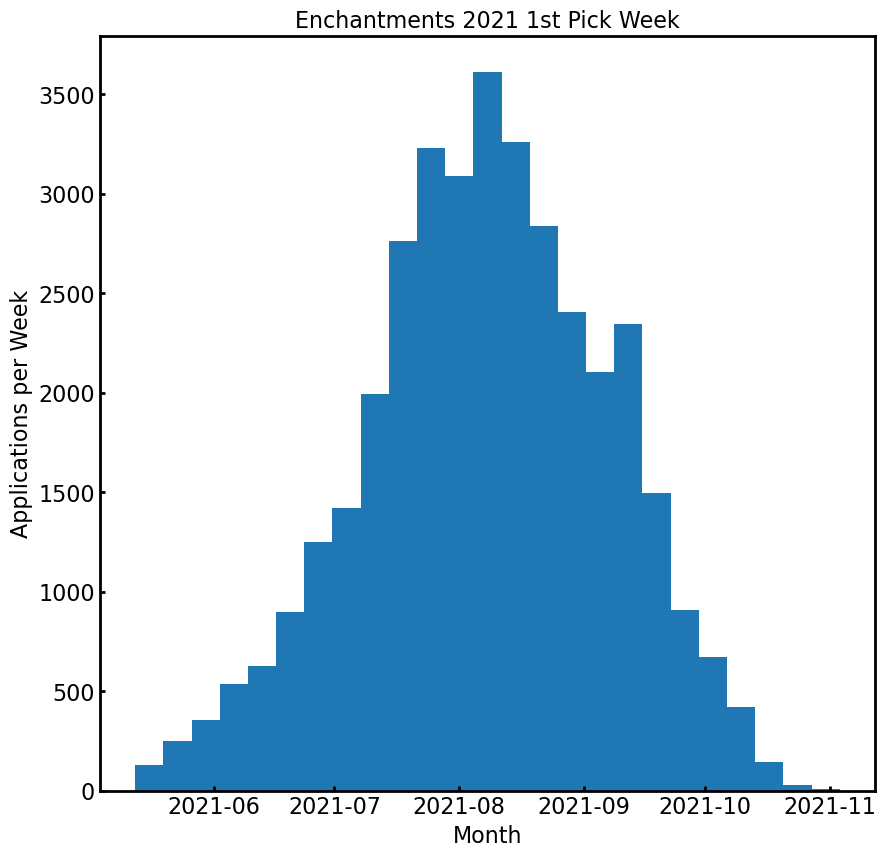

In [131]:
fig, ax = plt.subplots(figsize = (10,10))

ax.bar(preferred_week_1['index'], preferred_week_1['Preferred Entry \nDate 1'], width = 7)

ax.set_xlabel('Month')
ax.set_ylabel('Applications per Week')
ax.set_title('Enchantments 2021 1st Pick Week')
plt.savefig('Enchantmentsfirstpick.png', dpi = 300, facecolor = 'white')

In [99]:
df

,Preferred Entry \nDate 1,Preferred Division 1,Minimum \nAcceptable \nGroup Size 1,Maximum \nRequested \nGroup Size 1,Preferred Entry Date 2,Preferred Division 2,Minimum \nAcceptable \nGroup Size 2,Maximum \nRequested Group \nSize 2,Preferred Entry Date \n3,Preferred Division 3,Minimum \nAcceptable \nGroup Size 3,Maximum \nRequested \nGroup Size 3,Results Status,Awarded \nPreference,Awarded Entry \nDate,Awarded \nEntrance \nCode/Name,Awarded \nGroup Size
9423,2021-05-15,Core Enchantment Zone,4,4,5/22/21,Snow Zone,4,4,5/29/21,Colchuck Zone,4,4,No Response,2,5/22/21,Snow Zone,4
8070,2021-05-15,Core Enchantment Zone,4,4,6/12/21,Core Enchantment Zone,4,4,6/19/21,Core Enchantment Zone,4,4,Unsuccessful,NaN,NaN,NaN,NaN
7995,2021-05-15,Core Enchantment Zone,4,4,6/12/21,Core Enchantment Zone,4,4,7/17/21,Core Enchantment Zone,4,4,Unsuccessful,NaN,NaN,NaN,NaN
33618,2021-05-15,Snow Zone,6,6,5/22/21,Stuart Zone,6,6,5/29/21,Colchuck Zone,6,6,Accepted,1,5/15/21,Snow Zone,6
11701,2021-05-15,Core Enchantment Zone,3,3,10/1/21,Core Enchantment Zone,2,2,9/16/21,Core Enchantment Zone,4,4,No Response,1,5/15/21,Core Enchantment Zone,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11728,2021-10-29,Core Enchantment Zone,8,8,10/30/21,Core Enchantment Zone,8,8,10/31/21,Core Enchantment Zone,8,8,Accepted,1,NaN,10/29/21 Core Enchantment Zone,8
30779,2021-10-29,Core Enchantment Zone,6,6,10/8/21,Snow Zone,6,6,NaN,NaN,NaN,NaN,No Response,1,NaN,10/29/21 Core Enchantment Zone,6
23936,2021-10-30,Core Enchantment Zone,5,5,10/16/21,Core Enchantment Zone,5,5,10/2/21,Core Enchantment Zone,5,5,Unsuccessful,NaN,NaN,NaN,NaN
36479,2021-10-30,Stuart Zone,4,4,9/10/21,Core Enchantment Zone,4,4,10/30/21,Eightmile/Caroline Zone,4,4,Declined,1,10/30/21,Stuart Zone,4
